In [4]:
#pip install yfinance pytorch-lightning pytorch_tabnet
# pip install deepforest

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from pytorch_tabnet.tab_model import TabNetClassifier
import talib
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import yfinance as yf


In [11]:
symbol = 'META'
start_date = '2010-01-01'
end_date = '2022-01-01'

data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2021-12-27,338.850006,347.869995,338.010010,346.179993,346.179993,17795000
2021-12-28,346.630005,352.709991,345.200012,346.220001,346.220001,16637600
2021-12-29,346.910004,349.690002,341.640015,342.940002,342.940002,10747000


In [32]:
# Calculate the target variable (e.g., whether the stock price increased the next day)
data['target'] = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, 0)

# Drop the last row, which has no target value
data = data[:-1]

# Use technical indicators or any other feature engineering you'd like to perform

# Normalize the data (excluding the target variable)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['target']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1], index=data.index)

# Add the target variable back
data_scaled['target'] = data['target'].values


train_data, test_data = train_test_split(data_scaled, test_size=0.2, shuffle=False, random_state=42)

X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values

X_test = test_data.drop(columns=['target']).values
y_test = test_data['target'].values




In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score



In [33]:
import talib

# Add technical indicators
data['RSI'] = talib.RSI(data['Adj Close'])
data['SMA_10'] = talib.SMA(data['Adj Close'], timeperiod=10)
data['SMA_30'] = talib.SMA(data['Adj Close'], timeperiod=30)
data['EMA_10'] = talib.EMA(data['Adj Close'], timeperiod=10)
data['EMA_30'] = talib.EMA(data['Adj Close'], timeperiod=30)
data['MACD'], data['MACD_signal'], _ = talib.MACD(data['Adj Close'])
data['UpperBB'], data['MiddleBB'], data['LowerBB'] = talib.BBANDS(data['Adj Close'])
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Adj Close'])
data['CCI'] = talib.CCI(data['High'], data['Low'], data['Adj Close'])
data['ATR'] = talib.ATR(data['High'], data['Low'], data['Adj Close'])

# Create flags for important points
data['SMA_cross'] = np.where(data['SMA_10'] > data['SMA_30'], 1, 0)
data['EMA_cross'] = np.where(data['EMA_10'] > data['EMA_30'], 1, 0)
data['MACD_cross'] = np.where(data['MACD'] > data['MACD_signal'], 1, 0)
data['BB_squeeze'] = np.where((data['UpperBB'] - data['LowerBB']) / data['MiddleBB'] < 0.05, 1, 0)
data['ADX_trend'] = np.where(data['ADX'] > 25, 1, 0)
data['CCI_overbought'] = np.where(data['CCI'] > 100, 1, 0)
data['CCI_oversold'] = np.where(data['CCI'] < -100, 1, 0)

# Remove rows with NaN values
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['target']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1], index=data.index)

# Add the target variable back
data_scaled['target'] = data['target'].values

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_scaled, test_size=0.2, shuffle=False, random_state=42)

# Prepare the data
X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values
X_test = test_data.drop(columns=['target']).values
y_test = test_data['target'].values


/var/folders/gv/jgw7w7x15n7_rrzr0h9r68y40000gn/T/ipykernel_83832/3241144021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = talib.RSI(data['Adj Close'])
/var/folders/gv/jgw7w7x15n7_rrzr0h9r68y40000gn/T/ipykernel_83832/3241144021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_10'] = talib.SMA(data['Adj Close'], timeperiod=10)
/var/folders/gv/jgw7w7x15n7_rrzr0h9r68y40000gn/T/ipykernel_83832/3241144021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [34]:
# Train the TabNet model
model = TabNetClassifier(seed=42)
model.fit(
    X_train=X_train,
    y_train=y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['accuracy'],
    max_epochs=100,
    patience=10,
    batch_size=32,
    virtual_batch_size=8,
    num_workers=0,
    drop_last=False
)

# Obtain probabilistic outputs
y_proba = model.predict_proba(X_test)

# Get the predicted classes
y_pred = np.argmax(y_proba, axis=1)

# Calculate the precision scores
precision_long = precision_score(y_test, y_pred, pos_label=1)
precision_short = precision_score(y_test, y_pred, pos_label=0)

print("TabNet Precision (Long):", precision_long)
print("TabNet Precision (Short):", precision_short)

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.75535 | val_0_accuracy: 0.51805 |  0:00:02s
epoch 1  | loss: 0.70121 | val_0_accuracy: 0.46497 |  0:00:05s
epoch 2  | loss: 0.69414 | val_0_accuracy: 0.53079 |  0:00:08s
epoch 3  | loss: 0.69496 | val_0_accuracy: 0.49894 |  0:00:11s
epoch 4  | loss: 0.69309 | val_0_accuracy: 0.50531 |  0:00:13s
epoch 5  | loss: 0.69222 | val_0_accuracy: 0.52654 |  0:00:16s
epoch 6  | loss: 0.69284 | val_0_accuracy: 0.54352 |  0:00:19s
epoch 7  | loss: 0.69466 | val_0_accuracy: 0.48408 |  0:00:22s
epoch 8  | loss: 0.6927  | val_0_accuracy: 0.49894 |  0:00:25s
epoch 9  | loss: 0.69083 | val_0_accuracy: 0.50955 |  0:00:28s
epoch 10 | loss: 0.6909  | val_0_accuracy: 0.52442 |  0:00:31s
epoch 11 | loss: 0.6897  | val_0_accuracy: 0.53291 |  0:00:34s
epoch 12 | loss: 0.69162 | val_0_accuracy: 0.54777 |  0:00:36s
epoch 13 | loss: 0.69184 | val_0_accuracy: 0.53503 |  0:00:39s
epoch 14 | loss: 0.69003 | val_0_accuracy: 0.5138  |  0:00:42s
epoch 15 | loss: 0.69082 | val_0_accuracy: 0.49894 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Precision (Long): 0.5755627009646302
TabNet Precision (Short): 0.59375


In [35]:
# Train and evaluate Random Forest, XGBoost, and CatBoost classifiers
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
catboost = CatBoostClassifier(random_state=42, silent=True)

classifiers = [('Random Forest', rf), ('XGBoost', xgb), ('CatBoost', catboost)]

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision_long = precision_score(y_test, y_pred, pos_label=1)
    precision_short = precision_score(y_test, y_pred, pos_label=0)
    
    print(f"{name} Precision (Long):", precision_long)
    print(f"{name} Precision (Short):", precision_short)

Random Forest Precision (Long): 0.40476190476190477
Random Forest Precision (Short): 0.47086247086247085
XGBoost Precision (Long): 0.536723163841808
XGBoost Precision (Short): 0.4931972789115646
CatBoost Precision (Long): 0.5328467153284672
CatBoost Precision (Short): 0.5025380710659898


## Ensemble based on probabilities

In [36]:
from sklearn.metrics import precision_score
import numpy as np

# Obtain probabilistic outputs for each model
y_proba_tabnet = model.predict_proba(X_test)
y_proba_rf = rf.predict_proba(X_test)
y_proba_xgb = xgb.predict_proba(X_test)
y_proba_catboost = catboost.predict_proba(X_test)

# Calculate the average predicted probabilities
y_proba_ensemble = (y_proba_tabnet + y_proba_rf + y_proba_xgb + y_proba_catboost) / 4

# Get the predicted classes
y_pred_ensemble = np.argmax(y_proba_ensemble, axis=1)

# Calculate the precision scores
precision_long_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=1)
precision_short_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=0)

print("Ensemble Precision (Long):", precision_long_ensemble)
print("Ensemble Precision (Short):", precision_short_ensemble)

Ensemble Precision (Long): 0.5514018691588785
Ensemble Precision (Short): 0.5097276264591439


# Ensemble based on Voting

In [37]:
from scipy.stats import mode
from sklearn.metrics import precision_score
import numpy as np

# Obtain predicted classes for each model
y_pred_tabnet = model.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_catboost = catboost.predict(X_test)

# Combine the predictions into a single array
predictions = np.vstack((y_pred_tabnet, y_pred_rf, y_pred_xgb, y_pred_catboost))

# Calculate the mode (voting) for each instance
y_pred_voting, _ = mode(predictions, axis=0)

# Flatten the resulting array
y_pred_voting = y_pred_voting.flatten()

# Calculate the precision scores
precision_long_voting = precision_score(y_test, y_pred_voting, pos_label=1)
precision_short_voting = precision_score(y_test, y_pred_voting, pos_label=0)

print("Voting Ensemble Precision (Long):", precision_long_voting)
print("Voting Ensemble Precision (Short):", precision_short_voting)

Voting Ensemble Precision (Long): 0.5808823529411765
Voting Ensemble Precision (Short): 0.5074626865671642


# Train multiple TabNet models and get ensemble

In [42]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score
import numpy as np

N = 5  # number of TabNet models in the ensemble

# Train N TabNet models with different random seeds
tabnet_models = [TabNetClassifier(seed=i) for i in range(N)]

for model in tabnet_models:
    model.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['accuracy'],
        max_epochs=30,
        patience=0,
        batch_size=32,
        virtual_batch_size=8,
        num_workers=0,
        drop_last=False
    )

# Obtain the probabilistic outputs for each TabNet model
y_probas = [model.predict_proba(X_test) for model in tabnet_models]

# Calculate the average predicted probabilities
y_proba_ensemble = np.mean(y_probas, axis=0)

# Get the predicted classes
y_pred_ensemble = np.argmax(y_proba_ensemble, axis=1)

# Calculate the precision scores
precision_long_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=1)
precision_short_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=0)

print("TabNet Ensemble Precision (Long):", precision_long_ensemble)
print("TabNet Ensemble Precision (Short):", precision_short_ensemble)

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.73198 | val_0_accuracy: 0.47771 |  0:00:02s
epoch 1  | loss: 0.69913 | val_0_accuracy: 0.51805 |  0:00:05s
epoch 2  | loss: 0.69358 | val_0_accuracy: 0.51805 |  0:00:08s
epoch 3  | loss: 0.69498 | val_0_accuracy: 0.51805 |  0:00:11s
epoch 4  | loss: 0.69412 | val_0_accuracy: 0.51805 |  0:00:13s
epoch 5  | loss: 0.69204 | val_0_accuracy: 0.51805 |  0:00:16s
epoch 6  | loss: 0.69214 | val_0_accuracy: 0.48832 |  0:00:19s
epoch 7  | loss: 0.6927  | val_0_accuracy: 0.51592 |  0:00:22s
epoch 8  | loss: 0.69198 | val_0_accuracy: 0.52017 |  0:00:24s
epoch 9  | loss: 0.69316 | val_0_accuracy: 0.52654 |  0:00:27s
epoch 10 | loss: 0.69232 | val_0_accuracy: 0.51805 |  0:00:30s
epoch 11 | loss: 0.69227 | val_0_accuracy: 0.51805 |  0:00:32s
epoch 12 | loss: 0.69392 | val_0_accuracy: 0.51805 |  0:00:35s
epoch 13 | loss: 0.69268 | val_0_accuracy: 0.51805 |  0:00:38s
epoch 14 | loss: 0.69036 | val_0_accuracy: 0.52017 |  0:00:40s
epoch 15 | loss: 0.69109 | val_0_accuracy: 0.51805 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7415  | val_0_accuracy: 0.52654 |  0:00:02s
epoch 1  | loss: 0.69633 | val_0_accuracy: 0.53715 |  0:00:05s
epoch 2  | loss: 0.69521 | val_0_accuracy: 0.53079 |  0:00:08s
epoch 3  | loss: 0.69463 | val_0_accuracy: 0.54989 |  0:00:11s
epoch 4  | loss: 0.69158 | val_0_accuracy: 0.50531 |  0:00:14s
epoch 5  | loss: 0.69008 | val_0_accuracy: 0.53928 |  0:00:16s
epoch 6  | loss: 0.69166 | val_0_accuracy: 0.46921 |  0:00:19s
epoch 7  | loss: 0.69262 | val_0_accuracy: 0.51592 |  0:00:22s
epoch 8  | loss: 0.6925  | val_0_accuracy: 0.50318 |  0:00:25s
epoch 9  | loss: 0.69228 | val_0_accuracy: 0.50106 |  0:00:27s
epoch 10 | loss: 0.69201 | val_0_accuracy: 0.50743 |  0:00:30s
epoch 11 | loss: 0.69125 | val_0_accuracy: 0.5138  |  0:00:33s
epoch 12 | loss: 0.68936 | val_0_accuracy: 0.50531 |  0:00:36s
epoch 13 | loss: 0.69069 | val_0_accuracy: 0.51592 |  0:00:38s
epoch 14 | loss: 0.69114 | val_0_accuracy: 0.50531 |  0:00:41s
epoch 15 | loss: 0.6901  | val_0_accuracy: 0.52442 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75268 | val_0_accuracy: 0.52229 |  0:00:02s
epoch 1  | loss: 0.69714 | val_0_accuracy: 0.48195 |  0:00:05s
epoch 2  | loss: 0.69424 | val_0_accuracy: 0.52866 |  0:00:08s
epoch 3  | loss: 0.69472 | val_0_accuracy: 0.51805 |  0:00:11s
epoch 4  | loss: 0.69347 | val_0_accuracy: 0.52229 |  0:00:14s
epoch 5  | loss: 0.69323 | val_0_accuracy: 0.51805 |  0:00:17s
epoch 6  | loss: 0.69194 | val_0_accuracy: 0.50955 |  0:00:19s
epoch 7  | loss: 0.6913  | val_0_accuracy: 0.5138  |  0:00:22s
epoch 8  | loss: 0.69109 | val_0_accuracy: 0.48408 |  0:00:25s
epoch 9  | loss: 0.692   | val_0_accuracy: 0.50743 |  0:00:28s
epoch 10 | loss: 0.69065 | val_0_accuracy: 0.50955 |  0:00:31s
epoch 11 | loss: 0.69052 | val_0_accuracy: 0.48195 |  0:00:34s
epoch 12 | loss: 0.69125 | val_0_accuracy: 0.50106 |  0:00:36s
epoch 13 | loss: 0.69172 | val_0_accuracy: 0.50318 |  0:00:39s
epoch 14 | loss: 0.68983 | val_0_accuracy: 0.5138  |  0:00:42s
epoch 15 | loss: 0.6907  | val_0_accuracy: 0.52442 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75742 | val_0_accuracy: 0.47771 |  0:00:02s
epoch 1  | loss: 0.69578 | val_0_accuracy: 0.52229 |  0:00:05s
epoch 2  | loss: 0.69131 | val_0_accuracy: 0.49257 |  0:00:08s
epoch 3  | loss: 0.69242 | val_0_accuracy: 0.48195 |  0:00:10s
epoch 4  | loss: 0.69245 | val_0_accuracy: 0.52654 |  0:00:13s
epoch 5  | loss: 0.69014 | val_0_accuracy: 0.49469 |  0:00:16s
epoch 6  | loss: 0.68974 | val_0_accuracy: 0.49894 |  0:00:20s
epoch 7  | loss: 0.69174 | val_0_accuracy: 0.50106 |  0:00:23s
epoch 8  | loss: 0.69124 | val_0_accuracy: 0.50531 |  0:00:25s
epoch 9  | loss: 0.69016 | val_0_accuracy: 0.46285 |  0:00:28s
epoch 10 | loss: 0.69006 | val_0_accuracy: 0.53291 |  0:00:31s
epoch 11 | loss: 0.69277 | val_0_accuracy: 0.52866 |  0:00:34s
epoch 12 | loss: 0.69077 | val_0_accuracy: 0.48408 |  0:00:36s
epoch 13 | loss: 0.69223 | val_0_accuracy: 0.48832 |  0:00:39s
epoch 14 | loss: 0.6916  | val_0_accuracy: 0.51168 |  0:00:42s
epoch 15 | loss: 0.69236 | val_0_accuracy: 0.52017 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71359 | val_0_accuracy: 0.49894 |  0:00:02s
epoch 1  | loss: 0.69482 | val_0_accuracy: 0.50318 |  0:00:05s
epoch 2  | loss: 0.69433 | val_0_accuracy: 0.50743 |  0:00:08s
epoch 3  | loss: 0.691   | val_0_accuracy: 0.52866 |  0:00:10s
epoch 4  | loss: 0.69305 | val_0_accuracy: 0.50955 |  0:00:13s
epoch 5  | loss: 0.69336 | val_0_accuracy: 0.5138  |  0:00:16s
epoch 6  | loss: 0.69339 | val_0_accuracy: 0.51168 |  0:00:19s
epoch 7  | loss: 0.69259 | val_0_accuracy: 0.54352 |  0:00:22s
epoch 8  | loss: 0.69306 | val_0_accuracy: 0.51592 |  0:00:24s
epoch 9  | loss: 0.69312 | val_0_accuracy: 0.52866 |  0:00:27s
epoch 10 | loss: 0.69325 | val_0_accuracy: 0.51805 |  0:00:30s
epoch 11 | loss: 0.69231 | val_0_accuracy: 0.51805 |  0:00:33s
epoch 12 | loss: 0.69248 | val_0_accuracy: 0.51592 |  0:00:36s
epoch 13 | loss: 0.69223 | val_0_accuracy: 0.49682 |  0:00:38s
epoch 14 | loss: 0.69372 | val_0_accuracy: 0.52229 |  0:00:41s
epoch 15 | loss: 0.69207 | val_0_accuracy: 0.51592 |  0

In [45]:
N = 5  # number of TabNet models in the ensemble
vote_threshold = 0.8  # proportion of votes required to make a decision (e.g., 0.5 means at least half of the votes)


# Obtain the predicted classes for each TabNet model
y_preds = [model.predict(X_test) for model in tabnet_models]

# Combine the predictions into a single array
predictions = np.vstack(y_preds)

# Calculate the proportion of votes for long position
long_vote_proportion = np.mean(predictions, axis=0)

# Make the final decision based on the vote_threshold
y_pred_voting = np.where(long_vote_proportion >= vote_threshold, 1, 0)

# Calculate the precision scores
precision_long_voting = precision_score(y_test, y_pred_voting, pos_label=1)
precision_short_voting = precision_score(y_test, y_pred_voting, pos_label=0)

print("TabNet Voting Ensemble Precision (Long):", precision_long_voting)
print("TabNet Voting Ensemble Precision (Short):", precision_short_voting)

TabNet Voting Ensemble Precision (Long): 0.5531914893617021
TabNet Voting Ensemble Precision (Short): 0.49696969696969695


When using TabNetClassifier, you can indeed adjust several hyperparameters to customize the model. Here are some commonly adjusted hyperparameters:

n_d: The dimension of the decision prediction layer.

n_a: The dimension of the attention prediction layer.

n_steps: The total number of steps/decision layers in the TabNet model.

gamma: The coefficient for feature sparsity loss.

n_independent: The number of independent Gated Linear Unit (GLU) layers in each attention transformer.

n_shared: The number of shared Gated Linear Unit (GLU) layers in each attention transformer.

momentum: The momentum for batch normalization layers.

optimizer_fn: The optimizer function used for training.

scheduler_params: Parameters for the learning rate scheduler.

scheduler_fn: The learning rate scheduler function.

# Here is the same ensemble TabNet model with changed parameters

In [46]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

model = TabNetClassifier(
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    lambda_sparse=0.001,
    seed=42,
    optimizer_fn=torch.optim.Adam,  # You can also try other optimizers like AdamW or RMSprop
    optimizer_params=dict(lr=0.02),  # You can experiment with different learning rates
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,  # Try using a learning rate scheduler
    scheduler_params=dict(mode="min", patience=5, min_lr=1e-5, factor=0.9),
    verbose=0
)


from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import precision_score
import numpy as np

N = 8  # number of TabNet models in the ensemble

# Train N TabNet models with different random seeds
tabnet_models = [TabNetClassifier(seed=i) for i in range(N)]

for model in tabnet_models:
    model.fit(
        X_train=X_train,
        y_train=y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['accuracy'],
        max_epochs=40,
        patience=0,
        batch_size=32,
        virtual_batch_size=8,
        num_workers=0,
        drop_last=False
    )





/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.73198 | val_0_accuracy: 0.47771 |  0:00:02s
epoch 1  | loss: 0.69913 | val_0_accuracy: 0.51805 |  0:00:05s
epoch 2  | loss: 0.69358 | val_0_accuracy: 0.51805 |  0:00:08s
epoch 3  | loss: 0.69498 | val_0_accuracy: 0.51805 |  0:00:11s
epoch 4  | loss: 0.69412 | val_0_accuracy: 0.51805 |  0:00:13s
epoch 5  | loss: 0.69204 | val_0_accuracy: 0.51805 |  0:00:16s
epoch 6  | loss: 0.69214 | val_0_accuracy: 0.48832 |  0:00:19s
epoch 7  | loss: 0.6927  | val_0_accuracy: 0.51592 |  0:00:22s
epoch 8  | loss: 0.69198 | val_0_accuracy: 0.52017 |  0:00:24s
epoch 9  | loss: 0.69316 | val_0_accuracy: 0.52654 |  0:00:27s
epoch 10 | loss: 0.69232 | val_0_accuracy: 0.51805 |  0:00:30s
epoch 11 | loss: 0.69227 | val_0_accuracy: 0.51805 |  0:00:32s
epoch 12 | loss: 0.69392 | val_0_accuracy: 0.51805 |  0:00:35s
epoch 13 | loss: 0.69268 | val_0_accuracy: 0.51805 |  0:00:38s
epoch 14 | loss: 0.69036 | val_0_accuracy: 0.52017 |  0:00:41s
epoch 15 | loss: 0.69109 | val_0_accuracy: 0.51805 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7415  | val_0_accuracy: 0.52654 |  0:00:02s
epoch 1  | loss: 0.69633 | val_0_accuracy: 0.53715 |  0:00:05s
epoch 2  | loss: 0.69521 | val_0_accuracy: 0.53079 |  0:00:08s
epoch 3  | loss: 0.69463 | val_0_accuracy: 0.54989 |  0:00:10s
epoch 4  | loss: 0.69158 | val_0_accuracy: 0.50531 |  0:00:13s
epoch 5  | loss: 0.69008 | val_0_accuracy: 0.53928 |  0:00:16s
epoch 6  | loss: 0.69166 | val_0_accuracy: 0.46921 |  0:00:18s
epoch 7  | loss: 0.69262 | val_0_accuracy: 0.51592 |  0:00:21s
epoch 8  | loss: 0.6925  | val_0_accuracy: 0.50318 |  0:00:24s
epoch 9  | loss: 0.69228 | val_0_accuracy: 0.50106 |  0:00:27s
epoch 10 | loss: 0.69201 | val_0_accuracy: 0.50743 |  0:00:30s
epoch 11 | loss: 0.69125 | val_0_accuracy: 0.5138  |  0:00:32s
epoch 12 | loss: 0.68936 | val_0_accuracy: 0.50531 |  0:00:35s
epoch 13 | loss: 0.69069 | val_0_accuracy: 0.51592 |  0:00:38s
epoch 14 | loss: 0.69114 | val_0_accuracy: 0.50531 |  0:00:41s
epoch 15 | loss: 0.6901  | val_0_accuracy: 0.52442 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75268 | val_0_accuracy: 0.52229 |  0:00:02s
epoch 1  | loss: 0.69714 | val_0_accuracy: 0.48195 |  0:00:05s
epoch 2  | loss: 0.69424 | val_0_accuracy: 0.52866 |  0:00:08s
epoch 3  | loss: 0.69472 | val_0_accuracy: 0.51805 |  0:00:10s
epoch 4  | loss: 0.69347 | val_0_accuracy: 0.52229 |  0:00:13s
epoch 5  | loss: 0.69323 | val_0_accuracy: 0.51805 |  0:00:16s
epoch 6  | loss: 0.69194 | val_0_accuracy: 0.50955 |  0:00:19s
epoch 7  | loss: 0.6913  | val_0_accuracy: 0.5138  |  0:00:21s
epoch 8  | loss: 0.69109 | val_0_accuracy: 0.48408 |  0:00:24s
epoch 9  | loss: 0.692   | val_0_accuracy: 0.50743 |  0:00:27s
epoch 10 | loss: 0.69065 | val_0_accuracy: 0.50955 |  0:00:29s
epoch 11 | loss: 0.69052 | val_0_accuracy: 0.48195 |  0:00:32s
epoch 12 | loss: 0.69125 | val_0_accuracy: 0.50106 |  0:00:35s
epoch 13 | loss: 0.69172 | val_0_accuracy: 0.50318 |  0:00:37s
epoch 14 | loss: 0.68983 | val_0_accuracy: 0.5138  |  0:00:40s
epoch 15 | loss: 0.6907  | val_0_accuracy: 0.52442 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75742 | val_0_accuracy: 0.47771 |  0:00:02s
epoch 1  | loss: 0.69578 | val_0_accuracy: 0.52229 |  0:00:05s
epoch 2  | loss: 0.69131 | val_0_accuracy: 0.49257 |  0:00:08s
epoch 3  | loss: 0.69242 | val_0_accuracy: 0.48195 |  0:00:10s
epoch 4  | loss: 0.69245 | val_0_accuracy: 0.52654 |  0:00:13s
epoch 5  | loss: 0.69014 | val_0_accuracy: 0.49469 |  0:00:16s
epoch 6  | loss: 0.68974 | val_0_accuracy: 0.49894 |  0:00:18s
epoch 7  | loss: 0.69174 | val_0_accuracy: 0.50106 |  0:00:21s
epoch 8  | loss: 0.69124 | val_0_accuracy: 0.50531 |  0:00:24s
epoch 9  | loss: 0.69016 | val_0_accuracy: 0.46285 |  0:00:27s
epoch 10 | loss: 0.69006 | val_0_accuracy: 0.53291 |  0:00:29s
epoch 11 | loss: 0.69277 | val_0_accuracy: 0.52866 |  0:00:32s
epoch 12 | loss: 0.69077 | val_0_accuracy: 0.48408 |  0:00:35s
epoch 13 | loss: 0.69223 | val_0_accuracy: 0.48832 |  0:00:37s
epoch 14 | loss: 0.6916  | val_0_accuracy: 0.51168 |  0:00:40s
epoch 15 | loss: 0.69236 | val_0_accuracy: 0.52017 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71359 | val_0_accuracy: 0.49894 |  0:00:03s
epoch 1  | loss: 0.69482 | val_0_accuracy: 0.50318 |  0:00:06s
epoch 2  | loss: 0.69433 | val_0_accuracy: 0.50743 |  0:00:08s
epoch 3  | loss: 0.691   | val_0_accuracy: 0.52866 |  0:00:11s
epoch 4  | loss: 0.69305 | val_0_accuracy: 0.50955 |  0:00:14s
epoch 5  | loss: 0.69336 | val_0_accuracy: 0.5138  |  0:00:16s
epoch 6  | loss: 0.69339 | val_0_accuracy: 0.51168 |  0:00:19s
epoch 7  | loss: 0.69259 | val_0_accuracy: 0.54352 |  0:00:22s
epoch 8  | loss: 0.69306 | val_0_accuracy: 0.51592 |  0:00:25s
epoch 9  | loss: 0.69312 | val_0_accuracy: 0.52866 |  0:00:27s
epoch 10 | loss: 0.69325 | val_0_accuracy: 0.51805 |  0:00:30s
epoch 11 | loss: 0.69231 | val_0_accuracy: 0.51805 |  0:00:33s
epoch 12 | loss: 0.69248 | val_0_accuracy: 0.51592 |  0:00:35s
epoch 13 | loss: 0.69223 | val_0_accuracy: 0.49682 |  0:00:38s
epoch 14 | loss: 0.69372 | val_0_accuracy: 0.52229 |  0:00:41s
epoch 15 | loss: 0.69207 | val_0_accuracy: 0.51592 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78169 | val_0_accuracy: 0.50743 |  0:00:02s
epoch 1  | loss: 0.69561 | val_0_accuracy: 0.5138  |  0:00:05s
epoch 2  | loss: 0.69442 | val_0_accuracy: 0.52442 |  0:00:08s
epoch 3  | loss: 0.69418 | val_0_accuracy: 0.53291 |  0:00:10s
epoch 4  | loss: 0.69355 | val_0_accuracy: 0.49682 |  0:00:13s
epoch 5  | loss: 0.69239 | val_0_accuracy: 0.51805 |  0:00:16s
epoch 6  | loss: 0.69313 | val_0_accuracy: 0.51805 |  0:00:18s
epoch 7  | loss: 0.69284 | val_0_accuracy: 0.54565 |  0:00:21s
epoch 8  | loss: 0.69344 | val_0_accuracy: 0.50955 |  0:00:24s
epoch 9  | loss: 0.6922  | val_0_accuracy: 0.50106 |  0:00:27s
epoch 10 | loss: 0.69255 | val_0_accuracy: 0.51592 |  0:00:29s
epoch 11 | loss: 0.69109 | val_0_accuracy: 0.51805 |  0:00:32s
epoch 12 | loss: 0.69239 | val_0_accuracy: 0.50743 |  0:00:35s
epoch 13 | loss: 0.69244 | val_0_accuracy: 0.50318 |  0:00:37s
epoch 14 | loss: 0.69194 | val_0_accuracy: 0.52654 |  0:00:40s
epoch 15 | loss: 0.68931 | val_0_accuracy: 0.49682 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.71319 | val_0_accuracy: 0.52017 |  0:00:02s
epoch 1  | loss: 0.69574 | val_0_accuracy: 0.54565 |  0:00:05s
epoch 2  | loss: 0.69645 | val_0_accuracy: 0.51805 |  0:00:08s
epoch 3  | loss: 0.69445 | val_0_accuracy: 0.48195 |  0:00:10s
epoch 4  | loss: 0.69414 | val_0_accuracy: 0.48195 |  0:00:13s
epoch 5  | loss: 0.69417 | val_0_accuracy: 0.47983 |  0:00:16s
epoch 6  | loss: 0.6929  | val_0_accuracy: 0.52866 |  0:00:19s
epoch 7  | loss: 0.69228 | val_0_accuracy: 0.48832 |  0:00:21s
epoch 8  | loss: 0.69171 | val_0_accuracy: 0.50106 |  0:00:24s
epoch 9  | loss: 0.69173 | val_0_accuracy: 0.5138  |  0:00:27s
epoch 10 | loss: 0.69103 | val_0_accuracy: 0.54777 |  0:00:30s
epoch 11 | loss: 0.69166 | val_0_accuracy: 0.50318 |  0:00:32s
epoch 12 | loss: 0.69058 | val_0_accuracy: 0.49469 |  0:00:35s
epoch 13 | loss: 0.69073 | val_0_accuracy: 0.49045 |  0:00:38s
epoch 14 | loss: 0.69095 | val_0_accuracy: 0.51805 |  0:00:41s
epoch 15 | loss: 0.69024 | val_0_accuracy: 0.50955 |  0

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.78663 | val_0_accuracy: 0.51168 |  0:00:03s
epoch 1  | loss: 0.70133 | val_0_accuracy: 0.47558 |  0:00:06s
epoch 2  | loss: 0.69311 | val_0_accuracy: 0.47346 |  0:00:09s
epoch 3  | loss: 0.69459 | val_0_accuracy: 0.48408 |  0:00:12s
epoch 4  | loss: 0.6933  | val_0_accuracy: 0.49469 |  0:00:15s
epoch 5  | loss: 0.69114 | val_0_accuracy: 0.52866 |  0:00:18s
epoch 6  | loss: 0.69076 | val_0_accuracy: 0.52229 |  0:00:21s
epoch 7  | loss: 0.69155 | val_0_accuracy: 0.49045 |  0:00:24s
epoch 8  | loss: 0.69172 | val_0_accuracy: 0.52654 |  0:00:27s
epoch 9  | loss: 0.69248 | val_0_accuracy: 0.50318 |  0:00:30s
epoch 10 | loss: 0.69162 | val_0_accuracy: 0.52017 |  0:00:33s
epoch 11 | loss: 0.69176 | val_0_accuracy: 0.52017 |  0:00:36s
epoch 12 | loss: 0.69264 | val_0_accuracy: 0.52442 |  0:00:39s
epoch 13 | loss: 0.6922  | val_0_accuracy: 0.5138  |  0:00:42s
epoch 14 | loss: 0.69257 | val_0_accuracy: 0.53291 |  0:00:45s
epoch 15 | loss: 0.69183 | val_0_accuracy: 0.52229 |  0

## Tabnet Averaging Probability

In [48]:
# Obtain the probabilistic outputs for each TabNet model
y_probas = [model.predict_proba(X_test) for model in tabnet_models]

# Calculate the average predicted probabilities
y_proba_ensemble = np.mean(y_probas, axis=0)

# Get the predicted classes
y_pred_ensemble = np.argmax(y_proba_ensemble, axis=1)

# Calculate the precision scores
precision_long_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=1)
precision_short_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=0)

print("TabNet Ensemble Precision (Long):", precision_long_ensemble)
print("TabNet Ensemble Precision (Short):", precision_short_ensemble)

TabNet Ensemble Precision (Long): 0.541871921182266
TabNet Ensemble Precision (Short): 0.6307692307692307


## Tabnet Voting

In [47]:
N = 5  # number of TabNet models in the ensemble
vote_threshold = 0.5  # proportion of votes required to make a decision (e.g., 0.5 means at least half of the votes)


# Obtain the predicted classes for each TabNet model
y_preds = [model.predict(X_test) for model in tabnet_models]

# Combine the predictions into a single array
predictions = np.vstack(y_preds)

# Calculate the proportion of votes for long position
long_vote_proportion = np.mean(predictions, axis=0)

# Make the final decision based on the vote_threshold
y_pred_voting = np.where(long_vote_proportion >= vote_threshold, 1, 0)

# Calculate the precision scores
precision_long_voting = precision_score(y_test, y_pred_voting, pos_label=1)
precision_short_voting = precision_score(y_test, y_pred_voting, pos_label=0)

print("TabNet Voting Ensemble Precision (Long):", precision_long_voting)
print("TabNet Voting Ensemble Precision (Short):", precision_short_voting)

TabNet Voting Ensemble Precision (Long): 0.5334821428571429
TabNet Voting Ensemble Precision (Short): 0.782608695652174


In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Obtain probabilistic outputs
y_proba = model.predict_proba(X_test)
y_positive_proba = y_proba[:, 1]

# Calculate precision and recall for various thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_positive_proba)


## Regression 

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import talib
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download financial data using YFinance
symbol = 'META'
start_date = '2010-01-01'
end_date = '2022-01-01'

data = yf.download(symbol, start=start_date, end=end_date)

# Calculate the target variable (percentage change in closing price)
data['target'] = data['Close'].shift(-1)

data['RSI'] = talib.RSI(data['Close'])
data['SMA_10'] = talib.SMA(data['Close'], timeperiod=10)
data['SMA_30'] = talib.SMA(data['Close'], timeperiod=30)
data['EMA_10'] = talib.EMA(data['Close'], timeperiod=10)
data['EMA_30'] = talib.EMA(data['Close'], timeperiod=30)
data['MACD'], data['MACD_signal'], _ = talib.MACD(data['Close'])
data['UpperBB'], data['MiddleBB'], data['LowerBB'] = talib.BBANDS(data['Close'])
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'])
data['CCI'] = talib.CCI(data['High'], data['Low'], data['Close'])
data['ATR'] = talib.ATR(data['High'], data['Low'], data['Close'])

# Create flags for important points
data['SMA_cross'] = np.where(data['SMA_10'] > data['SMA_30'], 1, 0)
data['EMA_cross'] = np.where(data['EMA_10'] > data['EMA_30'], 1, 0)
data['MACD_cross'] = np.where(data['MACD'] > data['MACD_signal'], 1, 0)
data['BB_squeeze'] = np.where((data['UpperBB'] - data['LowerBB']) / data['MiddleBB'] < 0.05, 1, 0)
data['ADX_trend'] = np.where(data['ADX'] > 25, 1, 0)
data['CCI_overbought'] = np.where(data['CCI'] > 100, 1, 0)
data['CCI_oversold'] = np.where(data['CCI'] < -100, 1, 0)

# Remove rows with NaN values
data = data.dropna()

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['target']))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1], index=data.index)

# Add the target variable back
data_scaled['target'] = data['target'].values

# Split the data into training and testing sets
train_data, test_data = train_test_split(data_scaled, test_size=0.2, shuffle=False, random_state=42)

# Prepare the data
X_train = train_data.drop(columns=['target']).values
y_train = train_data['target'].values
X_test = test_data.drop(columns=['target']).values
y_test = test_data['target'].values

# Train the TabNet model
model = TabNetRegressor(seed=42)
model.fit(
    X_train=X_train,
    y_train=y_train.reshape(-1, 1),
    eval_set=[(X_test, y_test.reshape(-1, 1))],
    eval_metric=['mse'],
    max_epochs=200,
    patience=50,
    batch_size=32,
    virtual_batch_size=8,
    num_workers=0,
    drop_last=False
)



[*********************100%***********************]  1 of 1 completed


/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9480.94931| val_0_mse: 18458.01593|  0:00:02s
epoch 1  | loss: 564.79589| val_0_mse: 14347.35818|  0:00:05s
epoch 2  | loss: 364.90291| val_0_mse: 13619.19137|  0:00:07s
epoch 3  | loss: 359.35678| val_0_mse: 12131.37537|  0:00:10s
epoch 4  | loss: 201.93088| val_0_mse: 6755.18367|  0:00:13s
epoch 5  | loss: 209.66512| val_0_mse: 2712.92818|  0:00:15s
epoch 6  | loss: 209.13014| val_0_mse: 5192.40784|  0:00:18s
epoch 7  | loss: 184.00081| val_0_mse: 2206.992|  0:00:21s
epoch 8  | loss: 196.27242| val_0_mse: 2635.81241|  0:00:23s
epoch 9  | loss: 193.62599| val_0_mse: 1929.19247|  0:00:26s
epoch 10 | loss: 183.46605| val_0_mse: 557.04726|  0:00:28s
epoch 11 | loss: 171.75757| val_0_mse: 1103.42067|  0:00:31s
epoch 12 | loss: 176.89312| val_0_mse: 110.15885|  0:00:34s
epoch 13 | loss: 172.96622| val_0_mse: 1735.33021|  0:00:36s
epoch 14 | loss: 175.40888| val_0_mse: 2245.30869|  0:00:39s
epoch 15 | loss: 148.82792| val_0_mse: 2073.19852|  0:00:42s
epoch 16 | loss: 126.99

/opt/homebrew/anaconda3/envs/cqm-primo/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


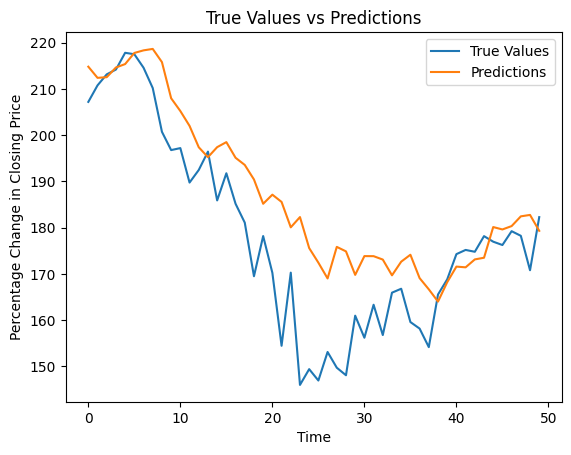

In [64]:
# Make predictions
y_pred = model.predict(X_test)

# Plot the true values and predictions
plt.plot(y_test[0:50], label='True Values')
plt.plot(y_pred[0:50], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Percentage Change in Closing Price')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

In [46]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate up and down prediction accuracy
test_data['prediction'] = y_pred
test_data['actual'] = y_test
test_data['pred_change'] = test_data['prediction'].diff()
test_data['actual_change'] = test_data['actual'].diff()

test_data['pred_direction'] = np.where(test_data['pred_change'] > 0, 'up', 'down')
test_data['actual_direction'] = np.where(test_data['actual_change'] > 0, 'up', 'down')

# Calculate the precision for up and down predictions
true_positive_up = np.sum((test_data['pred_direction'] == 'up') & (test_data['actual_direction'] == 'up'))
false_positive_up = np.sum((test_data['pred_direction'] == 'up') & (test_data['actual_direction'] == 'down'))
true_positive_down = np.sum((test_data['pred_direction'] == 'down') & (test_data['actual_direction'] == 'down'))
false_positive_down = np.sum((test_data['pred_direction'] == 'down') & (test_data['actual_direction'] == 'up'))

precision_up = true_positive_up / (true_positive_up + false_positive_up)
precision_down = true_positive_down / (true_positive_down + false_positive_down)

print(f"Precision for up predictions: {precision_up:.2f}")
print(f"Precision for down predictions: {precision_down:.2f}")

Precision for up predictions: 0.51
Precision for down predictions: 0.45


In [48]:
threshold = 0.03

# Calculate up, down, and neutral prediction accuracy with threshold
test_data['pred_change'] = test_data['prediction'].pct_change()
test_data['actual_change'] = test_data['actual'].pct_change()

test_data['pred_direction'] = np.where(test_data['pred_change'] > threshold, 'up', 
                                       np.where(test_data['pred_change'] < -threshold, 'down', 'neutral'))
test_data['actual_direction'] = np.where(test_data['actual_change'] > threshold, 'up', 
                                         np.where(test_data['actual_change'] < -threshold, 'down', 'neutral'))

# Calculate the precision for up and down predictions
true_positive_up = np.sum((test_data['pred_direction'] == 'up') & (test_data['actual_direction'] == 'up'))
false_positive_up = np.sum((test_data['pred_direction'] == 'up') & (test_data['actual_direction'] != 'up'))
true_positive_down = np.sum((test_data['pred_direction'] == 'down') & (test_data['actual_direction'] == 'down'))
false_positive_down = np.sum((test_data['pred_direction'] == 'down') & (test_data['actual_direction'] != 'down'))

precision_up = true_positive_up / (true_positive_up + false_positive_up)
precision_down = true_positive_down / (true_positive_down + false_positive_down)

print(f"Precision for up predictions with threshold {threshold}: {precision_up:.2f}")
print(f"Precision for down predictions with threshold {threshold}: {precision_down:.2f}")

Precision for up predictions with threshold 0.03: 0.12
Precision for down predictions with threshold 0.03: 0.22


# SAINT implementation

SAINT (Self-AttentIve INTeraction Model) is a deep learning model specifically designed for tabular data. It addresses some limitations of traditional models like gradient boosting machines and other deep learning methods when dealing with heterogeneous data types (e.g., continuous and categorical features).

Here are some key aspects that make SAINT special:

Self-attention mechanism: SAINT leverages the self-attention mechanism from the Transformer architecture, which has proven to be effective in handling sequential data in natural language processing. In SAINT, this mechanism is adapted to model interactions between different features in tabular data, capturing both global and local patterns.

Handling heterogeneous data types: SAINT is designed to handle a mix of continuous and categorical features effectively. The self-attention mechanism allows the model to weigh the importance of different features and their interactions adaptively, making it suitable for a wide range of tabular datasets.

Scalability: Unlike some other deep learning methods that struggle with large datasets or high-dimensional input spaces, SAINT can scale well with the size of the dataset and the number of features. The self-attention mechanism allows the model to focus on the most relevant information, reducing the complexity of learning interactions between features.

Strong empirical performance: In various benchmark datasets, SAINT has shown to outperform existing models like TabNet and gradient boosting machines, such as XGBoost, in terms of accuracy and other performance metrics.

These characteristics make SAINT an attractive choice for tabular data problems, particularly when dealing with heterogeneous data types or complex feature interactions. The model's strong performance and versatility could lead to its adoption in various domains, including finance, healthcare, and retail, among others.

In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        self.WQ = nn.Linear(d_model, d_model)
        self.WK = nn.Linear(d_model, d_model)
        self.WV = nn.Linear(d_model, d_model)
        self.WO = nn.Linear(d_model, d_model)

    def forward(self, queries, keys, values, mask=None):
        batch_size = queries.shape[0]

        Q = self.WQ(queries)
        K = self.WK(keys)
        V = self.WV(values)

        Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        attn_logits = torch.matmul(Q, K.transpose(-2, -1)) / self.head_dim**0.5
        if mask is not None:
            attn_logits = attn_logits.masked_fill(mask == 0, float('-inf'))

        attn_weights = F.softmax(attn_logits, dim=-1)
        attn_output = torch.matmul(attn_weights, V)

        attn_output = attn_output.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.WO(attn_output)
        return output, attn_weights


class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        return self.linear2(F.relu(self.linear1(x)))


class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionwiseFeedForward(d_model, d_ff)

        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask=None):
        x2, _ = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(x2))

        x2 = self.feed_forward(x)
        x = self.norm2(x + self.dropout(x2))
        return x


class SAINT(nn.Module):
    def __init__(self, num_layers, d_model, num_heads, d_ff, dropout, input_size, output_size):
        super(SAINT, self).__init__()
        self.embedding = nn.Linear(input_size, d_model)
        self.layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        x = torch.mean(x, dim=1)
        x = self.fc(x)
        return x

In [51]:
import torch
import torch.optim as optim
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


In [52]:
# Create DataLoader objects for the training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate the SAINT model
input_size = X_train.shape[1]
output_size = len(np.unique(y_train.numpy()))  # Assumes y_train contains all class labels
model = SAINT(num_layers=4, d_model=64, num_heads=4, d_ff=256, dropout=0.1, input_size=input_size, output_size=output_size)

# Set up the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [57]:
# Train the SAINT model
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}")


Epoch [1/300], Accuracy: 0.5074
Epoch [2/300], Accuracy: 0.5223
Epoch [3/300], Accuracy: 0.5096
Epoch [4/300], Accuracy: 0.5117
Epoch [5/300], Accuracy: 0.5138
Epoch [6/300], Accuracy: 0.5138
Epoch [7/300], Accuracy: 0.5159
Epoch [8/300], Accuracy: 0.5372
Epoch [9/300], Accuracy: 0.5180
Epoch [10/300], Accuracy: 0.5265
Epoch [11/300], Accuracy: 0.5456
Epoch [12/300], Accuracy: 0.5159
Epoch [13/300], Accuracy: 0.5202
Epoch [14/300], Accuracy: 0.5117
Epoch [15/300], Accuracy: 0.5393
Epoch [16/300], Accuracy: 0.5159
Epoch [17/300], Accuracy: 0.5180
Epoch [18/300], Accuracy: 0.5074
Epoch [19/300], Accuracy: 0.5096
Epoch [20/300], Accuracy: 0.5159
Epoch [21/300], Accuracy: 0.5244
Epoch [22/300], Accuracy: 0.5011
Epoch [23/300], Accuracy: 0.5138
Epoch [24/300], Accuracy: 0.5138
Epoch [25/300], Accuracy: 0.5138
Epoch [26/300], Accuracy: 0.5096
Epoch [27/300], Accuracy: 0.5287
Epoch [28/300], Accuracy: 0.4989
Epoch [29/300], Accuracy: 0.5053
Epoch [30/300], Accuracy: 0.5117
Epoch [31/300], Acc

In [58]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [59]:
# Obtain probabilistic outputs
with torch.no_grad():
    y_proba = model(X_test).numpy()

# Get the predicted classes
y_pred = np.argmax(y_proba, axis=1)

# Calculate the precision scores
precision_long = precision_score(y_test, y_pred, pos_label=1)
precision_short = precision_score(y_test, y_pred, pos_label=0)

print("SAINT Precision (Long):", precision_long)
print("SAINT Precision (Short):", precision_short)

SAINT Precision (Long): 0.55
SAINT Precision (Short): 0.5151515151515151


In [64]:
# Convert the training data to PyTorch tensors if needed
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Obtain probabilistic outputs for the training set
with torch.no_grad():
    y_train_proba = model(X_train_tensor).numpy()

# Get the predicted classes for the training set
y_train_pred = np.argmax(y_train_proba, axis=1)

# Calculate the precision scores for the training set
precision_train_long = precision_score(y_train, y_train_pred, pos_label=1)
precision_train_short = precision_score(y_train, y_train_pred, pos_label=0)

print("SAINT Training Precision (Long):", precision_train_long)
print("SAINT Training Precision (Short):", precision_train_short)

/var/folders/gv/jgw7w7x15n7_rrzr0h9r68y40000gn/T/ipykernel_76277/2246191493.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
/var/folders/gv/jgw7w7x15n7_rrzr0h9r68y40000gn/T/ipykernel_76277/2246191493.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train_tensor = torch.tensor(y_train, dtype=torch.long)


: 

: 

## Adding early stopping for SAINT

In [ ]:
# Train the SAINT model with early stopping and patience
num_epochs = 100
patience = 10
best_accuracy = -1
epochs_since_best = 0

for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}")

        # Early stopping logic
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            epochs_since_best = 0
            # Save the best model if needed
            torch.save(model.state_dict(), 'best_model.pt')
        else:
            epochs_since_best += 1
            if epochs_since_best >= patience:
                print("Early stopping triggered")
                break

# Load the best model for further evaluation or use
model.load_state_dict(torch.load('best_model.pt'))

## FTT Transformer

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        self.pe[:, 0::2] = torch.sin(position * div_term)
        self.pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = self.pe.unsqueeze(0).transpose(0, 1)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return x

class FTTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, d_model, nhead, num_layers, dim_feedforward):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc = nn.Linear(d_model, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = self.fc(x[-1])  # Select the output corresponding to the last time step
        return x

In [8]:
# Define hyperparameters and instantiate the model
num_classes = 2
input_dim = X_train.shape[1]
output_dim = num_classes  # Set the number of output classes based on your problem
d_model = 64
nhead = 4
num_layers = 4
dim_feedforward = 128

model = FTTransformer(input_dim, output_dim, d_model, nhead, num_layers, dim_feedforward)

# Prepare the data
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [9]:
# Train the model
num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    running_corrects = 0
    total_samples = 0
    
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss and correct predictions
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels).item()
        total_samples += inputs.size(0)

    # Calculate the epoch's loss and accuracy
    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects / total_samples

    # Print the epoch's loss and accuracy
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")


Epoch [1/500], Loss: 0.7065, Acc: 0.5037
Epoch [2/500], Loss: 0.6997, Acc: 0.5079
Epoch [3/500], Loss: 0.6973, Acc: 0.5033
Epoch [4/500], Loss: 0.6956, Acc: 0.5070
Epoch [5/500], Loss: 0.6964, Acc: 0.5062
Epoch [6/500], Loss: 0.6994, Acc: 0.4909
Epoch [7/500], Loss: 0.6944, Acc: 0.5166
Epoch [8/500], Loss: 0.6929, Acc: 0.5182
Epoch [9/500], Loss: 0.6934, Acc: 0.5141
Epoch [10/500], Loss: 0.6980, Acc: 0.5012
Epoch [11/500], Loss: 0.6981, Acc: 0.4880
Epoch [12/500], Loss: 0.6940, Acc: 0.5132
Epoch [13/500], Loss: 0.6938, Acc: 0.5137
Epoch [14/500], Loss: 0.6958, Acc: 0.4888
Epoch [15/500], Loss: 0.6931, Acc: 0.5199
Epoch [16/500], Loss: 0.6936, Acc: 0.5132
Epoch [17/500], Loss: 0.6956, Acc: 0.5062
Epoch [18/500], Loss: 0.6942, Acc: 0.5103
Epoch [19/500], Loss: 0.6949, Acc: 0.5000
Epoch [20/500], Loss: 0.6931, Acc: 0.5219
Epoch [21/500], Loss: 0.6937, Acc: 0.5108
Epoch [22/500], Loss: 0.6911, Acc: 0.5298
Epoch [23/500], Loss: 0.6943, Acc: 0.5186
Epoch [24/500], Loss: 0.6941, Acc: 0.5182
E

In [10]:
model.eval()
test_running_corrects = 0
test_total_samples = 0
test_true_positives = 0
test_false_positives = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_running_corrects += torch.sum(preds == labels).item()
        test_total_samples += inputs.size(0)
        test_true_positives += torch.sum((preds == 1) & (labels == 1)).item()
        test_false_positives += torch.sum((preds == 1) & (labels == 0)).item()

test_acc = test_running_corrects / test_total_samples
test_precision = test_true_positives / (test_true_positives + test_false_positives)

print(f"Test Accuracy: {test_acc:.4f}, Test Precision: {test_precision:.4f}")

Test Accuracy: 0.5298, Test Precision: 0.5274
